In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import scprep
import os

In [2]:
dataset = 'linear'

In [3]:
if dataset == '2_branches':
    extension = '_2_branches'
elif dataset == '3_branches':
    extension = '_3_branches'
elif dataset == 'linear':
    extension = ''

In [4]:
colors = {'mustard': '#E1AD01', 'berry': '#AC2F3D', 'teal': '#216E76', 'purple':'#502A4F', 'forest': '#065535', 'light forest': '#519167', 'pink': 'palevioletred', 'orange':'orange',
          'light yellow': '#E3BC81', 'light berry': '#c7505d', 'light teal': '#81ABA1', 'light purple': '#95636E', 'black': '#000000', 'gray':'#808080', 'sienna': 'sienna', 'white':'white', 'brown': 'brown'}

names = ['GSPA_QR', 'DiffusionEMD', 'MAGIC', 'Signals', 'GSPA', 'GAE_att_Ggene',
       'GAE_noatt_Ggene', 'Node2Vec_Ggene', 'GFMMD', 'Eigenscore', 'SIMBA', 'siVAE']

clist = np.array(['black', 'light yellow', 'purple', 'forest', 'mustard', 'teal',
         'berry', 'gray', 'light purple', 'light forest', 'light teal', 'sienna', 'white', 'pink', 'brown'])

In [5]:
results = pd.DataFrame(columns=range(4))
for model in names:
    out = pd.read_csv(f'results/{model}/spearmanr{extension}_demap_789.txt', sep=' ', header=None)
    out[3] = model
    results = pd.concat((results, out))
results.columns = ['run', 'metric', 'Spearman', 'model']

In [6]:
results['Spearman']  = results['Spearman']

In [7]:
names = np.array(names)
vals = results.groupby('model').mean('metric').loc[names]
names = names[np.argsort(vals, axis=0)].flatten()
clist = clist[np.argsort(vals, axis=0)].flatten()

/tmp/ipykernel_2066971/1477990216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=results['model'],


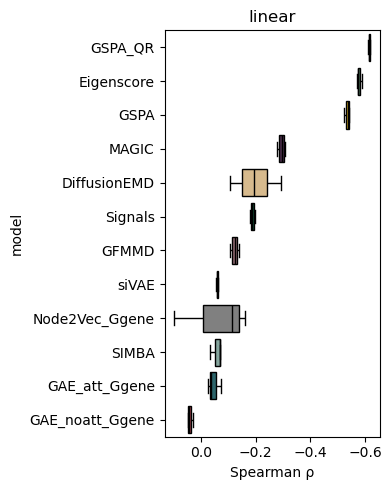

In [9]:
fig, ax = plt.subplots(figsize=(4,5))
sns.boxplot(y=results['model'],
            x=results['Spearman'].astype(float), 
            palette=[colors[c] for c in clist],
            order=names,
            ax=ax)
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel(f'Spearman ρ')
plt.title(f'{dataset}')
plt.tight_layout()

if not os.path.exists(f'./figures/'):
    os.makedirs(f'./figures/')
    
fig.savefig(f'./figures/demap_correlation_prediction{extension}.png', dpi=200)